In [1]:
#Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os
os.chdir('C:\\Users\\Ajay Jacob\\Documents\\Python Scripts\\Case Study 1 - Retail Case Study')

In [4]:
customer = pd.read_csv('Customer.csv')
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [5]:
prod_cat_info = pd.read_csv('prod_cat_info.csv')
prod_cat_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [6]:
transactions = pd.read_csv('Transactions.csv')
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [7]:
#renaming columns in Transcations dataframe

transactions.rename(columns={'cust_id':'customer_Id','prod_subcat_code':'prod_sub_cat_code'},inplace=True)
transactions.head()

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final.Ensure to keep all customers who have done transactions with us and select the join type accordingly

In [9]:
cust_trans = pd.merge(customer,transactions,on='customer_Id')
cust_trans.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,16197868036,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,16197868036,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store
3,268408,02-01-1970,M,4.0,28810141075,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop
4,268408,02-01-1970,M,4.0,64633435931,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store


In [10]:
cust_trans

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,16197868036,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,16197868036,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store
3,268408,02-01-1970,M,4.0,28810141075,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop
4,268408,02-01-1970,M,4.0,64633435931,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,27-12-1992,F,5.0,71369029396,18-10-2011,12,6,1,638,66.990,704.990,e-Shop
23049,269626,27-12-1992,F,5.0,94134051896,7/7/2011,3,1,3,1078,339.570,3573.570,MBR
23050,274308,29-12-1992,F,5.0,26208690928,22-10-2012,1,2,2,898,188.580,1984.580,MBR
23051,274308,29-12-1992,F,5.0,57358822237,5/9/2012,1,2,4,876,367.920,3871.920,e-Shop


In [11]:
customer_final = pd.merge(cust_trans,prod_cat_info,on=['prod_cat_code','prod_sub_cat_code'])
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,04-12-1992,F,1.0,63540378797,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction


### 2a. Get the column names and their corresponding data types

In [12]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_Id        23053 non-null  int64  
 1   DOB                23053 non-null  object 
 2   Gender             23044 non-null  object 
 3   city_code          23045 non-null  float64
 4   transaction_id     23053 non-null  int64  
 5   tran_date          23053 non-null  object 
 6   prod_sub_cat_code  23053 non-null  int64  
 7   prod_cat_code      23053 non-null  int64  
 8   Qty                23053 non-null  int64  
 9   Rate               23053 non-null  int64  
 10  Tax                23053 non-null  float64
 11  total_amt          23053 non-null  float64
 12  Store_type         23053 non-null  object 
 13  prod_cat           23053 non-null  object 
 14  prod_subcat        23053 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 2.8+ MB


### 2b. Top/Bottom 10 observations

In [13]:
customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
5,274630,01-02-1970,M,4.0,78357345891,11/4/2012,7,5,1,646,67.830,713.830,TeleShop,Books,Fiction
6,273541,01-02-1970,M,4.0,23916816961,9/2/2013,7,5,4,410,172.200,1812.200,e-Shop,Books,Fiction
7,269008,13-02-1970,F,6.0,35560569829,9/3/2013,7,5,1,1441,151.305,1592.305,e-Shop,Books,Fiction
8,269008,13-02-1970,F,6.0,94033312891,26-04-2012,7,5,5,746,391.650,4121.650,MBR,Books,Fiction
9,267199,14-02-1970,NaN,2.0,56749259881,11/1/2012,7,5,4,1049,440.580,4636.580,MBR,Books,Fiction


In [14]:
customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23043,268914,15-11-1992,F,3.0,1407823655,10/6/2011,10,5,1,1252,131.460,1383.460,MBR,Books,Non-Fiction
23044,269519,17-11-1992,M,9.0,29719500605,24-12-2013,10,5,4,1036,435.120,4579.120,TeleShop,Books,Non-Fiction
23045,273524,25-11-1992,F,1.0,25762805863,19-11-2012,10,5,1,1401,147.105,1548.105,Flagship store,Books,Non-Fiction
23046,272141,02-12-1992,F,10.0,71337087467,22-07-2012,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,Non-Fiction
23047,272141,02-12-1992,F,10.0,71337087467,16-07-2012,10,5,3,1422,447.930,4713.930,e-Shop,Books,Non-Fiction
23048,267812,04-12-1992,F,1.0,63540378797,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction
23052,268097,15-12-1992,F,7.0,90114483354,26-01-2011,10,5,4,1408,591.360,6223.360,e-Shop,Books,Non-Fiction


### 2c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [16]:
def five_number_summary(customer_final):
    summary = customer_final.describe(percentiles=[.25, .5, .75]).T
    summary = summary[['min', '25%', '50%', '75%', 'max']]
    summary.columns = ['Min', 'Q1', 'Median', 'Q3', 'Max']
    return summary
five_number_summary_df = five_number_summary(customer_final)
print(five_number_summary_df)

                           Min            Q1        Median            Q3  \
customer_Id         266783.000  2.689350e+05  2.709800e+05  2.731140e+05   
city_code                1.000  3.000000e+00  5.000000e+00  8.000000e+00   
transaction_id     3268991.000  2.493864e+10  5.009313e+10  7.533000e+10   
prod_sub_cat_code        1.000  3.000000e+00  5.000000e+00  1.000000e+01   
prod_cat_code            1.000  2.000000e+00  4.000000e+00  5.000000e+00   
Qty                     -5.000  1.000000e+00  3.000000e+00  4.000000e+00   
Rate                 -1499.000  3.120000e+02  7.100000e+02  1.109000e+03   
Tax                      7.350  9.828000e+01  1.990800e+02  3.657150e+02   
total_amt            -8270.925  7.624500e+02  1.754740e+03  3.569150e+03   

                            Max  
customer_Id        2.752650e+05  
city_code          1.000000e+01  
transaction_id     9.998755e+10  
prod_sub_cat_code  1.200000e+01  
prod_cat_code      6.000000e+00  
Qty                5.000000e+00  
R

### 2d. Frequency tables for all the categorical variables

In [17]:
df_cat = customer_final.select_dtypes(exclude = 'number')
df_cat.describe().T

,count,unique,top,freq
DOB,23053,3987,27-12-1988,32
Gender,23044,2,M,11811
tran_date,23053,1129,13-07-2011,35
Store_type,23053,4,e-Shop,9311
prod_cat,23053,6,Books,6069
prod_subcat,23053,18,Women,3048


In [18]:
#Method 2
# Function to get frequency tables for all categorical variables
def frequency_tables(customer_final):
    freq_tables = {}
    for col in customer_final.select_dtypes(include=['object', 'category']).columns:
        freq_tables[col] = customer_final[col].value_counts()
    return freq_tables

# Get the frequency tables
frequency_tables_dict = frequency_tables(customer_final)

# Display the frequency tables
for col, freq_table in frequency_tables_dict.items():
    print(f"Frequency table for {col}:\n{freq_table}\n")

Frequency table for DOB:
27-12-1988    32
17-09-1982    32
25-02-1974    27
20-03-1972    25
18-11-1991    24
              ..
02-01-1985     1
17-06-1992     1
17-06-1987     1
28-08-1988     1
01-09-1992     1
Name: DOB, Length: 3987, dtype: int64

Frequency table for Gender:
M    11811
F    11233
Name: Gender, dtype: int64

Frequency table for tran_date:
13-07-2011    35
25-09-2011    33
21-12-2013    33
23-10-2011    33
22-11-2011    33
              ..
24-02-2014     2
23-02-2014     2
28-02-2014     1
21-02-2014     1
27-02-2014     1
Name: tran_date, Length: 1129, dtype: int64

Frequency table for Store_type:
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64

Frequency table for prod_cat:
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64

Frequency table for prod_subcat:
Women    

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

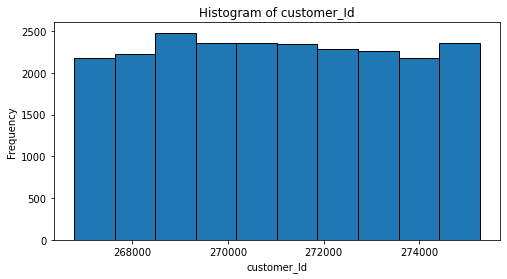

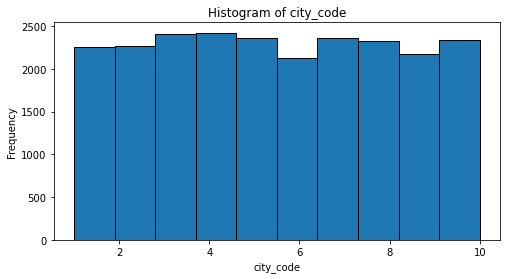

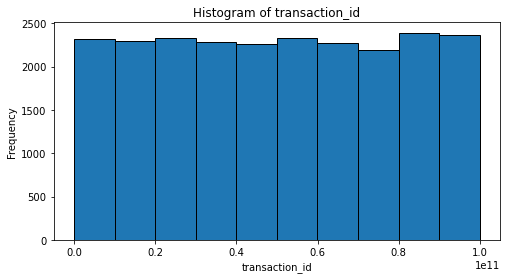

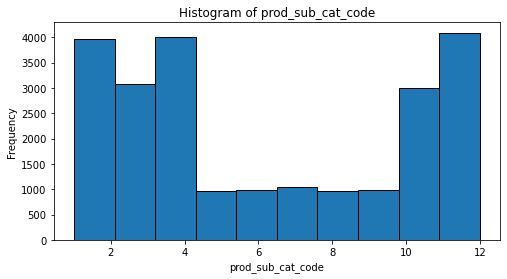

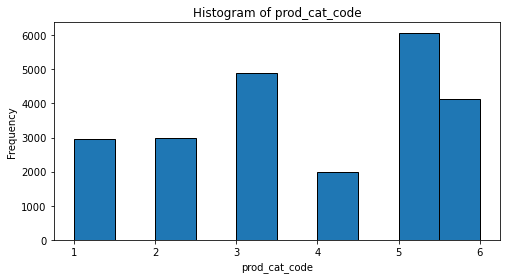

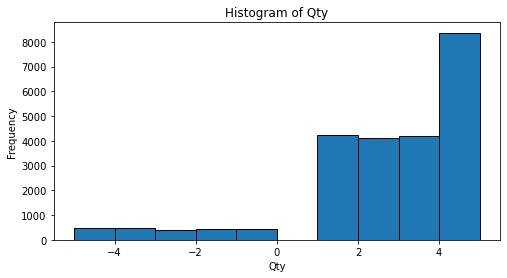

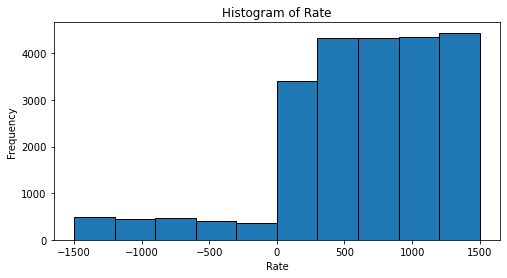

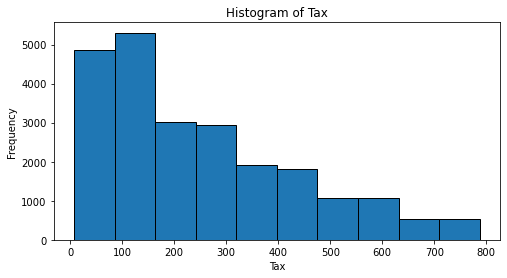

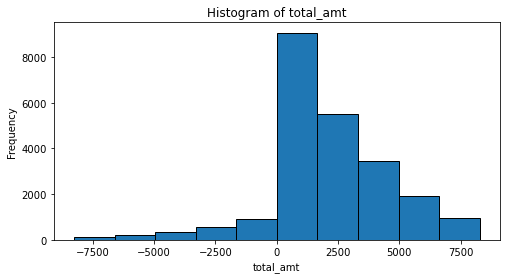

In [20]:
# Generate histograms for continuous variables
continuous_vars = customer_final.select_dtypes(include=['number']).columns

for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    plt.hist(customer_final[var], bins=10, edgecolor='k')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

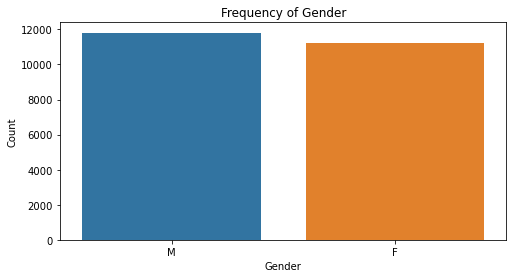

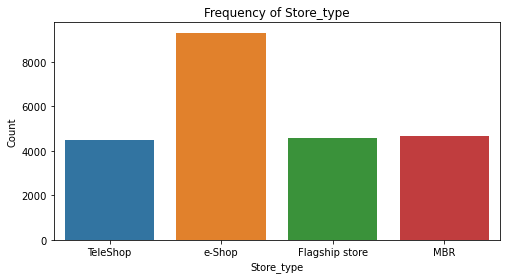

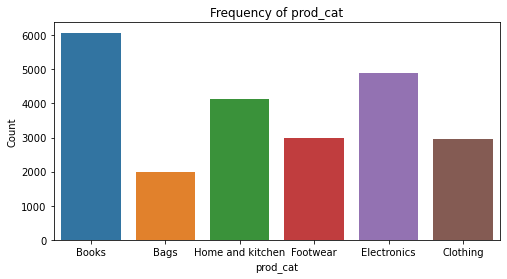

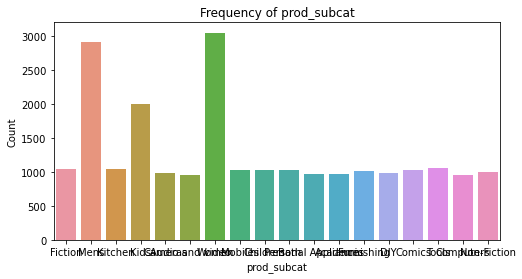

In [25]:
# Generate frequency bar plots for categorical variables

# List of columns to exclude
exclude_columns = ['DOB','tran_date']

# Generate bar plots for categorical variables excluding specified columns
categorical_vars = customer_final.select_dtypes(include='object').columns
categorical_vars = [col for col in categorical_vars if col not in exclude_columns]

for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=customer_final[var])
    plt.title(f'Frequency of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

### 4a. Time period of the available transaction data

In [27]:
customer_final['tran_date'] = pd.to_datetime(customer_final.tran_date)
customer_final.dtypes
# Calculate the time period
earliest_date = customer_final['tran_date'].min()
latest_date = customer_final['tran_date'].max()
time_period = (latest_date - earliest_date).days

# Display the results
print(f"Earliest Transaction Date: {earliest_date}")
print(f"Latest Transaction Date: {latest_date}")
print(f"Time Period: {time_period}")

Earliest Transaction Date: 2011-01-02 00:00:00
Latest Transaction Date: 2014-12-02 00:00:00
Time Period: 1430


### 4.b Count of transactions where the total amount of transaction was negative

In [28]:
neg_tran=customer_final[customer_final.total_amt<0].total_amt

In [30]:
len(neg_tran)

2177

### 5. Analyze which product categories are more popular among females vs male customers

In [35]:
pop_cat = customer_final.groupby(['Gender','prod_cat'])[['Qty']].sum().reset_index()
pop_cat

,Gender,prod_cat,Qty
0,F,Bags,2362
1,F,Books,7070
2,F,Clothing,3425
3,F,Electronics,5832
4,F,Footwear,3716
5,F,Home and kitchen,4895
6,M,Bags,2346
7,M,Books,7587
8,M,Clothing,3748
9,M,Electronics,6476


### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [42]:
# Method 1

# Calculate the number of customers per city
city_counts = customer_final['city_code'].value_counts()

# Find the city code with the maximum customers
max_city_code = city_counts.idxmax()
max_customers = city_counts.max()

# Calculate the total number of customers
total_customers = customer_final['customer_Id'].count()

# Calculate the percentage of customers from the city with the maximum customers
percentage_customers = (max_customers / total_customers) * 100

print(f"City code with the maximum customers: {max_city_code}")
print(f"Number of customers from {max_city_code}: {max_customers}")
print(f"Percentage of customers from {max_city_code}: {percentage_customers:.2f}%")

City code with the maximum customers: 4.0
Number of customers from 4.0: 2422
Percentage of customers from 4.0: 10.51%


In [44]:
#Method 2

max_cust_city = customer_final.groupby('city_code')['customer_Id'].count().sort_values(ascending=False)
max_cust_city

city_code
4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
Name: customer_Id, dtype: int64

In [49]:
#Percentage

perct = (max_cust_city.head(1)/max_cust_city.sum())*100
print(perct)

city_code
4.0    10.509872
Name: customer_Id, dtype: float64


### 7. Which store type sells the maximum products by value and by quantity?

In [51]:
#Method 1

# Calculate total product quantity and product value by store type
quantity_by_store = customer_final.groupby('Store_type')['Qty'].sum()
value_by_store = customer_final.groupby('Store_type')['total_amt'].sum()

# Find the store type with the maximum product quantity
max_quantity_store = quantity_by_store.idxmax()
max_quantity = quantity_by_store.max()

# Find the store type with the maximum product value
max_value_store = value_by_store.idxmax()
max_value = value_by_store.max()

# Display the results
print(f"Store type with the maximum products by quantity: {max_quantity_store}")
print(f"Total product quantity for {max_quantity_store}: {max_quantity}")

print(f"\nStore type with the maximum products by value: {max_value_store}")
print(f"Total product value for {max_value_store}: {max_value}")

Store type with the maximum products by quantity: e-Shop
Total product quantity for e-Shop: 22763

Store type with the maximum products by value: e-Shop
Total product value for e-Shop: 19824816.05


In [54]:
#Method 2

quantity = customer_final.groupby('Store_type')['Qty'].sum().sort_values(ascending = False)
quantity.head(1)

Store_type
e-Shop    22763
Name: Qty, dtype: int64

In [56]:
value = customer_final.groupby('Store_type')['total_amt'].sum().sort_values(ascending = False)
value.head(1)

Store_type
e-Shop    19824816.05
Name: total_amt, dtype: float64

### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [60]:
#Method 1
# Filter transactions from Flagship Stores for Electronics and Clothing categories
filtered_df = customer_final[(customer_final['Store_type'] == 'Flagship store') & (customer_final['prod_cat'].isin(['Electronics', 'Clothing']))]

# Calculate the total amount earned
total_amount_earned = filtered_df['total_amt'].sum()

# Display the result
print(f"Total amount earned from Electronics and Clothing categories at Flagship Stores: {total_amount_earned}")

Total amount earned from Electronics and Clothing categories at Flagship Stores: 3409559.27


In [64]:
#Method 2

pivot_store = customer_final.pivot_table(index='prod_cat',columns='Store_type',values='total_amt',aggfunc='sum')
EC_store = pivot_store.loc[['Clothing','Electronics'],'Flagship store']
EC_store.sum()

3409559.27

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [70]:
# Method 1
filtered_store = customer_final.pivot_table(index='Gender',columns='prod_cat',values='total_amt',aggfunc='sum')
ME_amt = filtered_store.loc['M',['Electronics']]
print(f"Total amount earned from Male customers in Electronics category: {ME_amt.sum()}")

Total amount earned from Male customers in Electronics category: 5703109.425


In [72]:
#Method 2
# Filter transactions from Male customers for Electronics category
filtered = customer_final[(customer_final['Gender'] == 'M') & (customer_final['prod_cat']=='Electronics')]

# Calculate the total amount earned
total_amount_earned_male = filtered['total_amt'].sum()

# Display the result
print(f"Total amount earned from Male Customers in Electronics category: {total_amount_earned_male}")

Total amount earned from Male Customers in Electronics category: 5703109.425


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [78]:
# Filtering only transaction with positive amount

post_amt = customer_final[customer_final.total_amt>0]

# Finding unique transactions

unique_trans = post_amt.groupby('customer_Id')['transaction_id'].count().reset_index()
unique_trans

# Finding unique transactions >10

unique_10 = unique_trans[unique_trans['transaction_id']>10]
print(unique_10)

      customer_Id  transaction_id
4          266794              11
2426       270535              11
2606       270803              11
3867       272741              11
4032       273014              11
4815       274227              11


### 11. For all customers aged between 25 - 35, find out:
### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [89]:
# Method 1

# change data type to datetime
customer_final['DOB']= pd.to_datetime(customer_final['DOB'], format="%d-%m-%Y") 
customer_final['DOB'] = customer_final['DOB'].where(customer_final['DOB'] < pd.Timestamp.now(), customer_final['DOB'] -  np.timedelta64(100, 'Y'))

# Calculate age
customer_final['Age']=(pd.Timestamp.now()-customer_final['DOB']).astype('<m8[Y]')
customer_final['Age'].isin(values=customer_final['Age'][25:35])

0        False
1        False
2        False
3        False
4        False
         ...  
23048    False
23049    False
23050    False
23051    False
23052    False
Name: Age, Length: 23053, dtype: bool

In [90]:
EB_store = customer_final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum')
BooksElec=EB_store.loc[["Books","Electronics"],:]

# Making bins for age group
customer_final['Age_bin'] = pd.cut(customer_final['Age'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

# Making group of customer between age 25 to 35
cust= customer_final.groupby(['Age_bin','prod_cat'])['total_amt'].sum()
cust

Age_bin  prod_cat        
25-35    Bags                 802108.450
         Books               2424053.970
         Clothing            1361172.150
         Electronics         2080087.360
         Footwear            1299129.715
         Home and kitchen    1700222.615
36-46    Bags                1912364.935
         Books               6104634.380
         Clothing            3076065.850
         Electronics         5196645.935
         Footwear            3029658.060
         Home and kitchen    4100735.665
47-57    Bags                1410235.255
         Books               4294005.690
         Clothing            1813899.490
         Electronics         3445730.340
         Footwear            1890986.500
         Home and kitchen    2638035.010
Name: total_amt, dtype: float64

In [91]:
print('Total amount is: ', cust.loc['25-35',['Books','Electronics']].sum())

Total amount is:  4504141.33


In [92]:
#Method 2
# Filter customers aged between 25 - 35 and with product categories "Electronics" and "Books"
filtered_df = customer_final[(customer_final['Age'] >= 25) & (customer_final['Age'] <= 35) & (customer_final['prod_cat'].isin(['Electronics', 'Books']))]

# Calculate the total amount spent
total_amount_spent = filtered_df['total_amt'].sum()

# Display the result
print(f"Total amount spent for Electronics and Books by customers aged between 25 - 35: {total_amount_spent}")

Total amount spent for Electronics and Books by customers aged between 25 - 35: 4504141.33


### b. What was the total amount spent by these customers between 1st Jan 2014 to 1st Mar 2014?

In [84]:
#Method 1

# Customer with age 25-35
cust_total_amt= customer_final[customer_final['Age_bin']=='25-35']
cust_total_amt

# selecting the date columns
final_amount= cust_total_amt[(cust_total_amt['tran_date'] >='2014-01-01') & (cust_total_amt['tran_date'] <='2014-03-01')]
final_amount

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age,Age_bin
849,273731,1988-07-28,F,7.0,194354511,2014-01-20,7,5,4,551,231.420,2435.420,Flagship store,Books,Fiction,35.0,25-35
870,270535,1988-12-13,F,7.0,81750321697,2014-01-17,7,5,1,1430,150.150,1580.150,e-Shop,Books,Fiction,35.0,25-35
889,273026,1989-04-21,M,10.0,46741038644,2014-01-28,7,5,5,1163,610.575,6425.575,MBR,Books,Fiction,35.0,25-35
951,267864,1990-11-17,M,3.0,18062786609,2014-03-01,7,5,3,623,196.245,2065.245,MBR,Books,Fiction,33.0,25-35
1011,269757,1992-03-15,F,8.0,39911702084,2014-01-18,7,5,1,1064,111.720,1175.720,e-Shop,Books,Fiction,32.0,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22910,274000,1989-08-22,M,10.0,789912743,2014-01-01,10,5,2,295,61.950,651.950,e-Shop,Books,Non-Fiction,34.0,25-35
22922,269637,1989-12-10,F,1.0,42879420828,2014-01-14,10,5,1,778,81.690,859.690,MBR,Books,Non-Fiction,34.0,25-35
22934,269536,1990-03-21,M,5.0,32889219128,2014-01-01,10,5,5,1423,747.075,7862.075,e-Shop,Books,Non-Fiction,34.0,25-35
22959,272165,1990-12-01,M,4.0,91039584326,2014-02-01,10,5,1,1268,133.140,1401.140,e-Shop,Books,Non-Fiction,33.0,25-35


In [85]:
print('The total amount is: ', final_amount['total_amt'].sum().round(2))

The total amount is:  354358.03


In [88]:
#Method 2

# Filter transactions for customers aged between 25 - 35 and between 1st Jan 2014 to 1st Mar 2014
filtered_df = customer_final[(customer_final['Age'] >= 25) & (customer_final['Age'] <= 35) & 
                 (customer_final['tran_date'] >= '2014-01-01') & 
                 (customer_final['tran_date'] <= '2014-03-01')]

# Calculate the total amount spent
total_amount_spent = filtered_df['total_amt'].sum()

# Display the result
print(f"Total amount spent by customers aged between 25 - 35 between 1st Jan 2014 to 1st Mar 2014: {total_amount_spent}")

Total amount spent by customers aged between 25 - 35 between 1st Jan 2014 to 1st Mar 2014: 354358.03
